In [29]:
# Import General Libraries 
import tensorflow
from tensorflow import keras
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix

# Deep Learning Libraries
from keras.layers import Dense, Dropout, Activation
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from sklearn.utils import class_weight

# transform data libraries
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

#logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve


In [2]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
#load dataset
data = pd.read_csv('UCI_Credit_Card.csv')
# Inspecting Data; Preliminary Review 
data.info()
print('------------------------')
print(data.describe())
print('------------------------')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null float64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null float64
BILL_AMT2                     30000 non-null float64
BILL_AMT3                     30000 non-null float64
BILL_AMT4                     30000 non-null float64
BILL_AMT5                     30000 non-null float64
BILL_AMT6   

In [3]:
#we do not need the ID variable for our analysis
data = data.drop('ID', axis=1)

The percentage of clients that defaulted is 22.12 %
-------------------------------------------------------------------------------------
The percentage of clients that did not default is 77.88 %


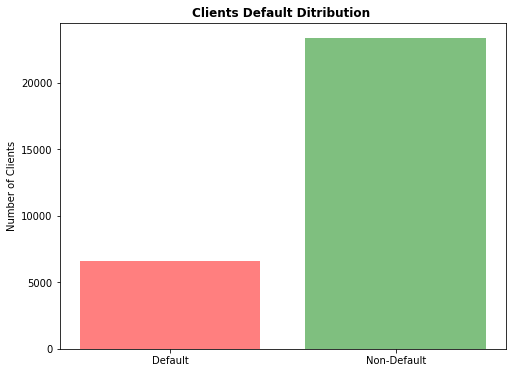

In [4]:
#The response variable y
# Get current size
fig_size = plt.rcParams["figure.figsize"]
#print ("Current size:", fig_size)
fig_size[0] = 8
fig_size[1] = 6


#Creation of bar plot for the number of clients that defaulted and the ones that did not default
default =  data['default.payment.next.month'][data['default.payment.next.month']==1].count()
non_default = data['default.payment.next.month'][data['default.payment.next.month']==0].count()

print("The percentage of clients that defaulted is", 100*default/(default+non_default), "%")
print("-------------------------------------------------------------------------------------")
print("The percentage of clients that did not default is", 100*non_default/(default+non_default), "%")


totals = [default, non_default]
options = [1,2]
plt.bar(options,totals,alpha=0.5, color= ['red', 'green'])


plt.xticks(options,['Default','Non-Default'])
plt.ylabel('Number of Clients')
plt.title('Clients Default Ditribution ',fontweight="bold", size=12)
plt.show()

The min value of LIMIT_BAL variable is 10000.0
The max value of LIMIT_BAL variable is 1000000.0


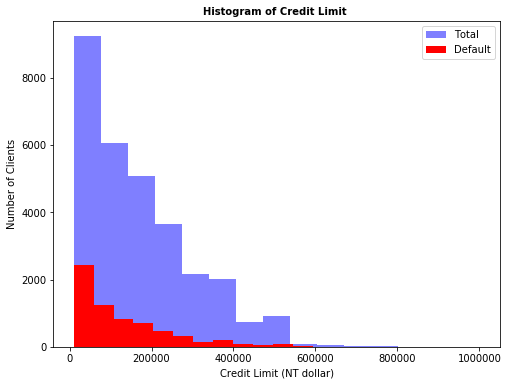

In [5]:
# Credit Limit variable (i.e.'LIMIT_BAL' )
# Histogram for the numerical variable 'LIMIT_BAL'

print("The min value of LIMIT_BAL variable is", data['LIMIT_BAL'].min())
print("The max value of LIMIT_BAL variable is", data['LIMIT_BAL'].max())

#%matplotlib inline
bins = 15
plt.hist(data.LIMIT_BAL, bins = bins,label = 'Total',alpha=0.5, color='blue')
plt.hist(data.LIMIT_BAL[data['default.payment.next.month'] == 1], bins = bins,label = 'Default', alpha=1, color='red')

plt.xlabel('Credit Limit (NT dollar)')
plt.ylabel('Number of Clients')
plt.title('Histogram of Credit Limit ',fontweight="bold", size=10)
plt.legend();plt.show()

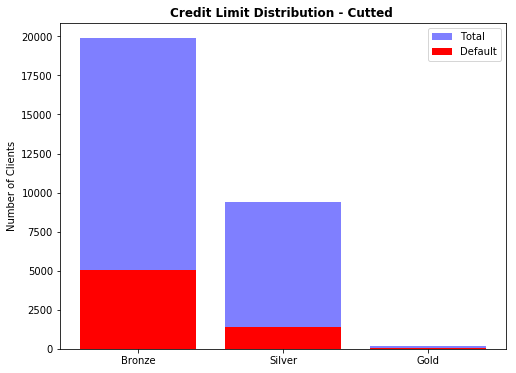

In [6]:
# Credit Limit Cutted into categories 
#Credit Limit categorisation and Creation of bar plot for Credit Card Categories and default rate

#print(data['LIMIT_BAL'].min())
data['LIMIT_BAL_cat'] = pd.cut(data.LIMIT_BAL,[10000, 200000, 500000, 1000000], labels = ["bronze","silver","gold"])

bronze= data['LIMIT_BAL_cat'][data['LIMIT_BAL_cat']=="bronze"].count()
bronze_default = data['LIMIT_BAL_cat'][(data['LIMIT_BAL_cat']=="bronze")&(data['default.payment.next.month']==1)].count()

silver = data['LIMIT_BAL_cat'][data['LIMIT_BAL_cat']=="silver"].count()
silver_default = data['LIMIT_BAL_cat'][(data['LIMIT_BAL_cat']=="silver")&(data['default.payment.next.month']==1)].count()

gold = data['LIMIT_BAL_cat'][data['LIMIT_BAL_cat']=="gold"].count()
gold_default = data['LIMIT_BAL_cat'][(data['LIMIT_BAL_cat']=="gold")&(data['default.payment.next.month']==1)].count()


total_limit = [bronze,silver,gold]
default_limit= [bronze_default,silver_default, gold_default]
credit_limit = [1,2,3]
plt.bar(credit_limit,total_limit,alpha=0.5, label='Total', color='blue')
plt.bar(credit_limit,default_limit,alpha=1, label='Default', color='red')

plt.xticks([1,2,3],['Bronze','Silver', 'Gold'])
plt.ylabel('Number of Clients')
plt.title('Credit Limit Distribution - Cutted ',fontweight="bold", size=12)
plt.legend();plt.show()

2    18112
1    11888
Name: SEX, dtype: int64


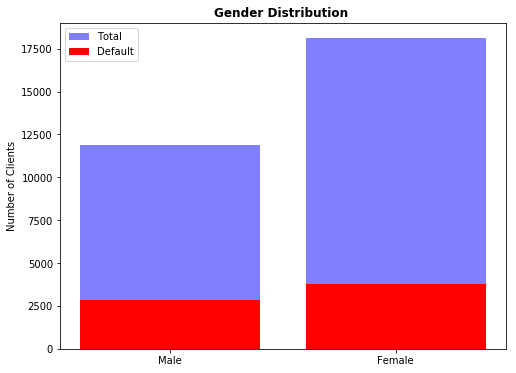

In [7]:
# Gender (i.e. 'SEX' )

#Count values
print(data['SEX'].value_counts()) #more women than men


#Creation of bar plot for 'SEX' variable and default rate
men = data['SEX'][data['SEX']==1].count()
men_default = data['SEX'][(data['SEX']==1)&(data['default.payment.next.month']==1)].count()

women = data['SEX'][data['SEX']==2].count()
women_default = data['SEX'][(data['SEX']==2)&(data['default.payment.next.month']==1)].count()

total_sex = [men, women]
default_sex = [men_default,women_default]
gender = [1,2]
plt.bar(gender,total_sex,alpha=0.5, label='Total', color='blue')
plt.bar(gender,default_sex,alpha=1, label='Default', color='red')

plt.xticks([1,2],['Male','Female']);plt.ylabel('Number of Clients')
plt.title('Gender Distribution ',fontweight="bold", size=12)
plt.legend();plt.show()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64


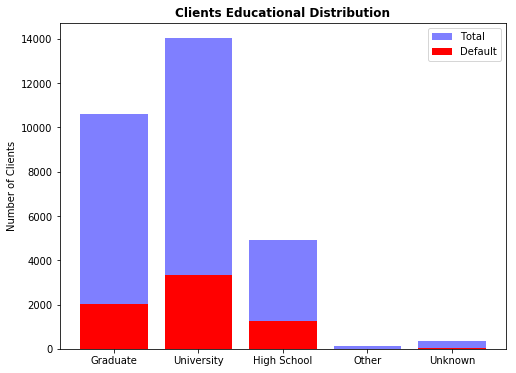

In [8]:
# Education (i.e.'EDUCATION' )

#Count values
print(data['EDUCATION'].value_counts()) 


#Creation of bar plot for 'EDUCATION' variable and default rate
grad =  data['EDUCATION'][data['EDUCATION']==1].count()
grad_default = data['EDUCATION'][(data['EDUCATION']==1)&(data['default.payment.next.month']==1)].count()

uni =  data['EDUCATION'][data['EDUCATION']==2].count()
uni_default = data['EDUCATION'][(data['EDUCATION']==2)&(data['default.payment.next.month']==1)].count()

high =  data['EDUCATION'][data['EDUCATION']==3].count()
high_default = data['EDUCATION'][(data['EDUCATION']==3)&(data['default.payment.next.month']==1)].count()

other =  data['EDUCATION'][data['EDUCATION']==4].count()
other_default = data['EDUCATION'][(data['EDUCATION'] == 4)&(data['default.payment.next.month']==1)].count()

unknown =  data['EDUCATION'][(data['EDUCATION'] > 4) | (data['EDUCATION'] < 1)].count()
unknown_default = data['EDUCATION'][((data['EDUCATION'] > 4) | (data['EDUCATION'] < 1))  & (data['default.payment.next.month']==1)].count()

total_education = [grad, uni, high, other, unknown]
default_education = [grad_default,uni_default,high_default, other_default, unknown_default]
degree = [1,2,3,4,5]
plt.bar(degree,total_education,alpha=0.5, label='Total', color='blue')
plt.bar(degree,default_education,alpha=1, label='Default', color='red')

plt.xticks([1,2,3,4,5],['Graduate','University','High School','Other', 'Unknown'])
plt.ylabel('Number of Clients')
plt.title('Clients Educational Distribution',fontweight="bold", size=12)
plt.legend();plt.show()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64


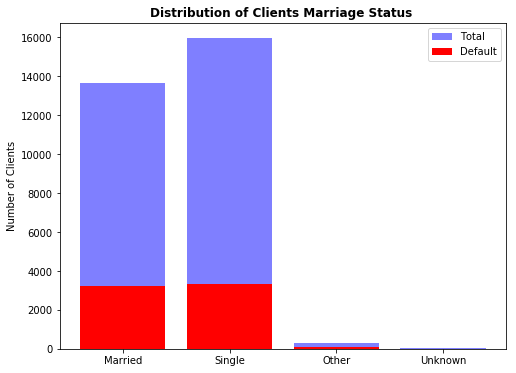

In [9]:
# Marriage Status (i.e.'MARRIAGE')

#Count values
print(data['MARRIAGE'].value_counts()) 

#Creation of bar plot for 'MARRIAGE' variable and default rate

#print(data['MARRIAGE'].min())
#print(data['MARRIAGE'].max())
married =  data['MARRIAGE'][data['MARRIAGE']==1].count()
married_default = data['MARRIAGE'][(data['MARRIAGE']==1)&(data['default.payment.next.month']==1)].count()

single =  data['MARRIAGE'][data['MARRIAGE']==2].count()
single_default = data['MARRIAGE'][(data['MARRIAGE']==2)&(data['default.payment.next.month']==1)].count()

other =  data['MARRIAGE'][data['MARRIAGE']==3].count()
other_default = data['MARRIAGE'][(data['MARRIAGE']==3)&(data['default.payment.next.month']==1)].count()

unknown =  data['MARRIAGE'][data['MARRIAGE']==0].count()
unknown_default = data['MARRIAGE'][(data['MARRIAGE']==0)&(data['default.payment.next.month']==1)].count()

total_marriage = [married, single, other, unknown]
default_marriage = [married_default,single_default,other_default, unknown_default]
status = [1,2,3,4]
plt.bar(status,total_marriage,alpha=0.5, label='Total', color='blue')
plt.bar(status,default_marriage,alpha=1, label='Default', color='red')

plt.xticks([1,2,3,4],['Married','Single','Other', 'Unknown'])
plt.ylabel('Number of Clients')
plt.title('Distribution of Clients Marriage Status ',fontweight="bold", size=12)
plt.legend(); plt.show()

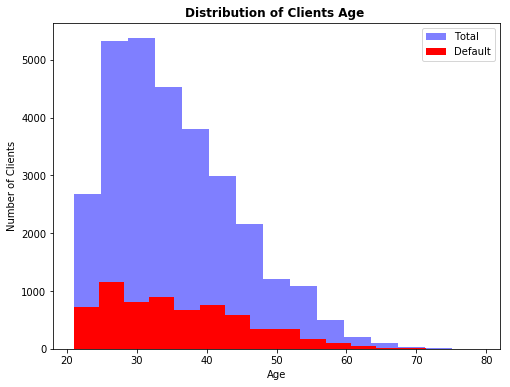

In [10]:
# Age (i.e.'AGE' )
#Histogram of the numerical variable 'Age' and its default rate

bins = 15
plt.hist(data['AGE'],bins = bins,label = 'Total',alpha=0.5, color='blue')
plt.hist(data['AGE'][data['default.payment.next.month']==1], bins = bins,label = 'Default',alpha=1, color='red')

plt.xlabel('Age')
plt.ylabel('Number of Clients')
plt.title('Distribution of Clients Age ',fontweight="bold", size=12)
plt.legend();plt.show()

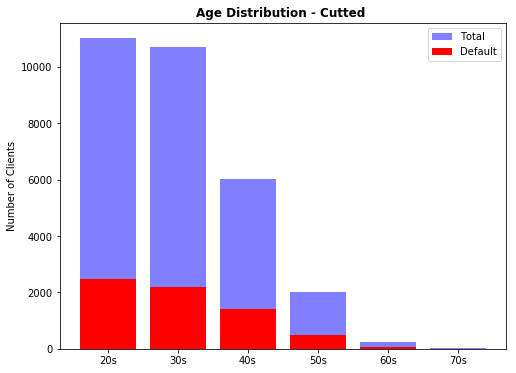

In [11]:
# Creation of AGE Groups and the default rate on each of these groups

#print(data['AGE'].min())
#print(data['AGE'].max())
data['AGE_cat'] = pd.cut(data.AGE,[20, 30, 40, 50, 60, 70, 80], labels = ["20s","30s","40s", "50s", "60s", "70s"])


twenties= data['AGE_cat'][data['AGE_cat']=="20s"].count()
twenties_default = data['AGE_cat'][(data['AGE_cat']=="20s")&(data['default.payment.next.month']==1)].count()

thirties = data['AGE_cat'][data['AGE_cat']=="30s"].count()
thirties_default = data['AGE_cat'][(data['AGE_cat']=="30s")&(data['default.payment.next.month']==1)].count()

fourties = data['AGE_cat'][data['AGE_cat']=="40s"].count()
fourties_default = data['AGE_cat'][(data['AGE_cat']=="40s")&(data['default.payment.next.month']==1)].count()

fifties = data['AGE_cat'][data['AGE_cat']=="50s"].count()
fifties_default = data['AGE_cat'][(data['AGE_cat']=="50s")&(data['default.payment.next.month']==1)].count()

sixties = data['AGE_cat'][data['AGE_cat']=="60s"].count()
sixties_default = data['AGE_cat'][(data['AGE_cat']=="60s")&(data['default.payment.next.month']==1)].count()

seventies = data['AGE_cat'][data['AGE_cat']=="70s"].count()
seventies_default = data['AGE_cat'][(data['AGE_cat']=="70s")&(data['default.payment.next.month']==1)].count()

total_age = [twenties,thirties,fourties, fifties, sixties, seventies]
default_age= [twenties_default, thirties_default, fourties_default, fifties_default, sixties_default, seventies_default]
credit_age = [1,2,3, 4, 5, 6]
plt.bar(credit_age,total_age,alpha=0.5, label='Total', color='blue')
plt.bar(credit_age,default_age,alpha=1, label='Default', color='red')

plt.xticks([1,2,3, 4, 5, 6],["20s","30s","40s", "50s", "60s", "70s"])
plt.ylabel('Number of Clients')
plt.title('Age Distribution - Cutted ',fontweight="bold", size=12)
plt.legend();plt.show()

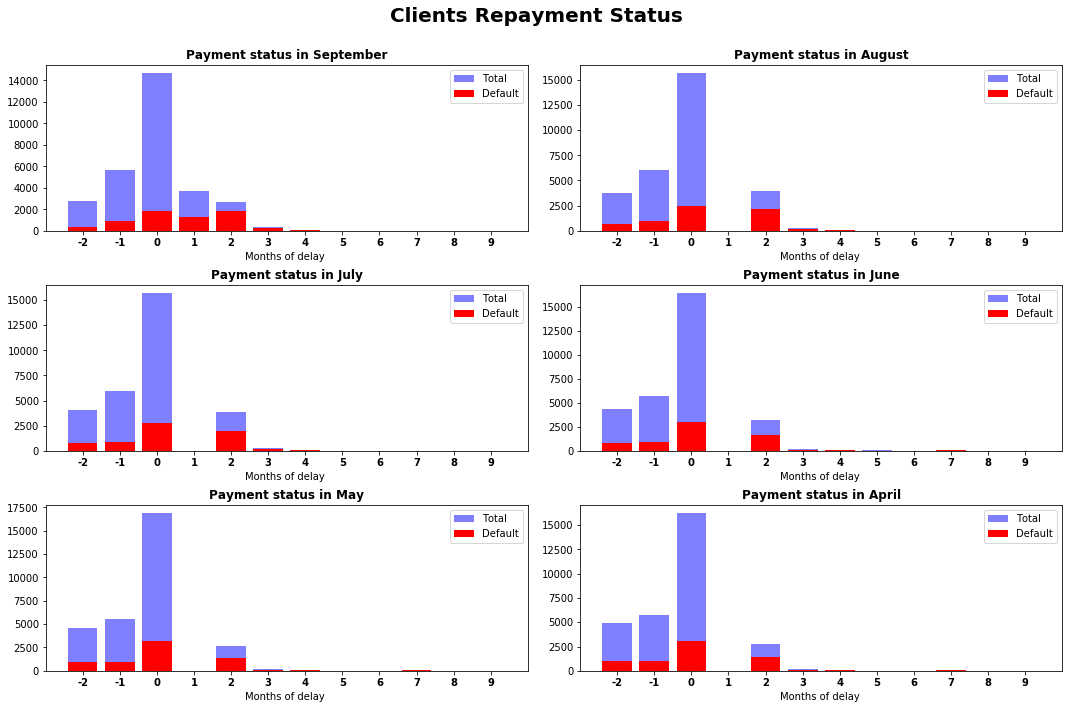

In [12]:
# Payment status (i.e.'PAY_X' )
plt.figure(figsize=(15,10))
i = 0
indexes = list(data.columns)

plt.suptitle('Clients Repayment Status',fontweight="bold", fontsize=20)

for k in indexes[5:11]:
    ax=plt.subplot(3,2,i+1)
    m_delay = np.zeros(12)
    m_delay_default = np.zeros(12)  
    for j in range(-2,10):
            m_delay[j+2] = data[k][data[k]==j].count()
            m_delay_default[j+2] = data[k][(data[k]==j)&(data['default.payment.next.month']==1)].count()  

    status_values = [-2,-1,0,1,2,3,4,5,6,7,8,9]
    plt.bar(status_values,m_delay,alpha=0.5, label='Total', color='blue')
    plt.bar(status_values,m_delay_default,alpha=1, label='Default', color='red')

    plt.xticks(status_values,['-2','-1','0','1','2','3','4','5','6','7','8','9'], fontweight="bold", size=10)
    ax.set_xlabel('Months of delay ')
    months = ['September','August','July','June','May','April']
    ax.set_title('Payment status in ' + months[i], fontweight="bold", size=12)
    ax.legend()
    i+=1
    
plt.tight_layout()
plt.subplots_adjust(top=0.90)
plt.show()

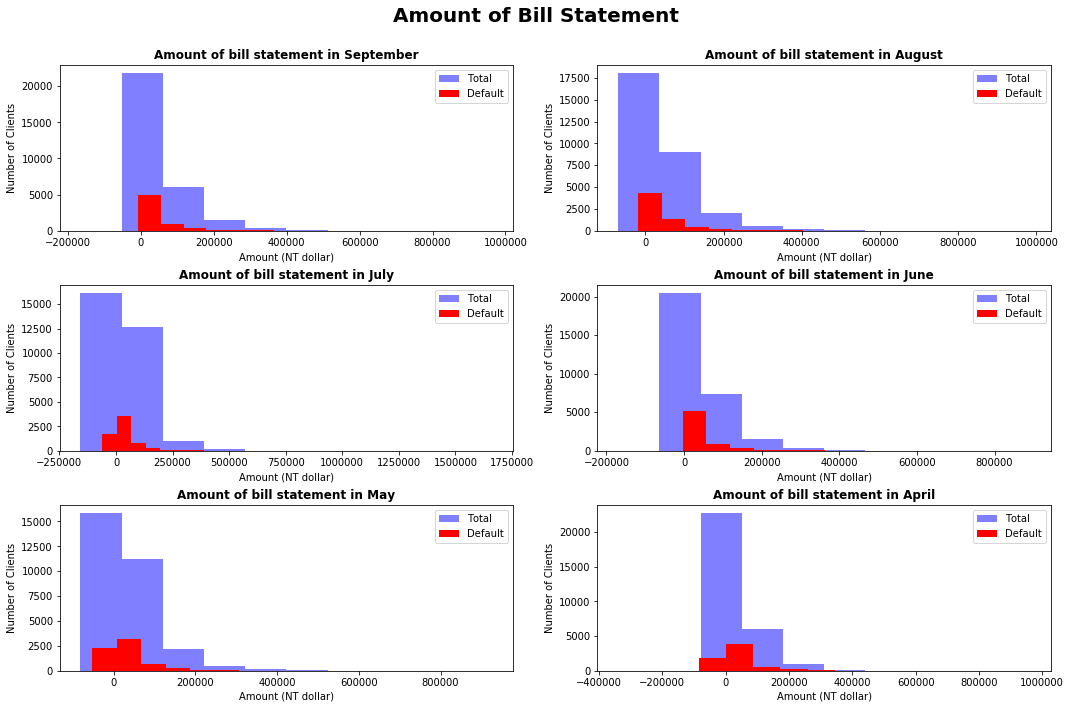

In [13]:
# Amount of bill statement (i.e.'BILL_AMT_' )
#in the logarithmic scale if the ax.set_yscale command is not in a comment

plt.figure(figsize=(15,10))
i = 0
indexes = list(data.columns)

plt.suptitle('Amount of Bill Statement',fontweight="bold", fontsize=20)
for k in indexes[11:17]:
    ax=plt.subplot(3,2,i+1)
    bins = 10
    plt.hist(data[k],bins = bins,label = 'Total',alpha=0.5, color='blue')
    plt.hist(data[k][data['default.payment.next.month']==1], bins = bins,label = 'Default',alpha=1, color='red')

    plt.xlabel('Amount (NT dollar)')
    plt.ylabel('Number of Clients')
    #ax.set_yscale('log', nonposy='clip')

    months = ['September','August','July','June','May','April']
    ax.set_title('Amount of bill statement in ' + months[i], fontweight="bold", size=12)
    ax.legend()
    i+=1  
plt.tight_layout()
plt.subplots_adjust(top=0.90)
plt.show()

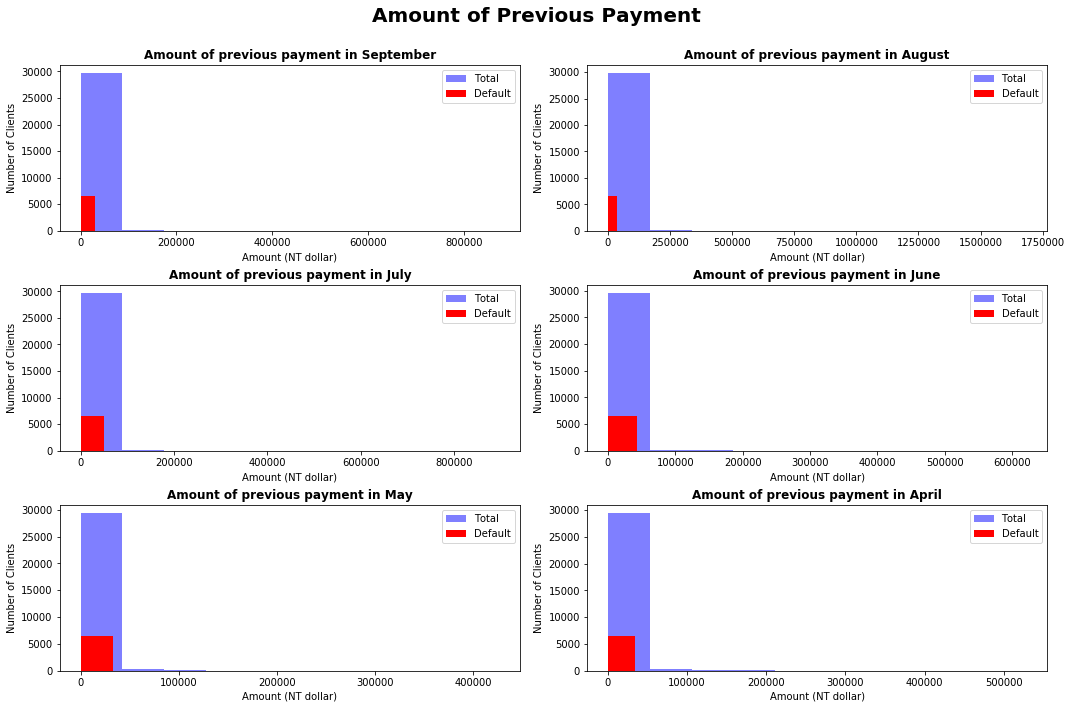

In [14]:
# Amount of previous payment (Feature name :'PAY_AMT_' )
#in the logarithmic scale if the ax.set_yscale command is not in a comment

plt.figure(figsize=(15,10))
i = 0
indexes = list(data.columns)


plt.suptitle('Amount of Previous Payment',fontweight="bold", fontsize=20)

for k in indexes[17:23]:
    ax=plt.subplot(3,2,i+1)
    bins = 10
    plt.hist(data[k],bins = bins,label = 'Total',alpha=0.5, color='blue')
    plt.hist(data[k][data['default.payment.next.month']==1], bins = bins,label = 'Default',alpha=1, color='red')

    plt.xlabel('Amount (NT dollar)')
    plt.ylabel('Number of Clients')
    #ax.set_yscale('log', nonposy='clip')
    months = ['September','August','July','June','May','April']
    ax.set_title('Amount of previous payment in ' + months[i], fontweight="bold", size=12)
    ax.legend()
    i+=1      
plt.tight_layout()
plt.subplots_adjust(top=0.90)
plt.show()

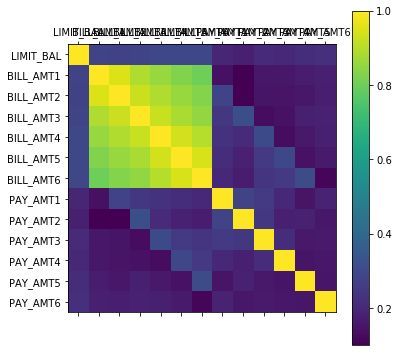

In [15]:
#Correlation plot for the numerical variables only
data_num= data.filter(['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'])

plt.figure(figsize=(15,5))
corr_num = data_num.corr()
plt.matshow(corr_num)
plt.xticks(range(len(data_num.columns)), data_num.columns)
plt.yticks(range(len(data_num.columns)), data_num.columns)
plt.colorbar()
plt.show()

In [16]:
########################DATA PREPARATION & DATA CLEANING##############################################

data= data.drop(['AGE_cat', 'LIMIT_BAL_cat'], axis=1)

#rename  PAY_0 to PAY_1 for cohesion reasons
data = data.rename(columns={'PAY_0': 'PAY_1'})

#Merge in 'EDUCATION' variable, categories 5, 6 and 0, which are the unknown ones into one category/value.Keep 'others' (4) and 'unknown' (5) separate
#unknown_c = (data['EDUCATION'] == 5) | (data['EDUCATION'] == 6) | (data['EDUCATION'] == 0)
#data.loc[unknown_c, 'EDUCATION'] = 5
#data['EDUCATION'].value_counts()

#data.head()

In [17]:
#Transform categorival variables to new dummy variables
OHE = OneHotEncoder(sparse=False)
sex = OHE.fit_transform(data[['SEX']])
marriage = OHE.fit_transform(data[['MARRIAGE']])
education = OHE.fit_transform(data[['EDUCATION']])

categoricalVars = np.hstack((sex, marriage, education))
numericVars = data.drop( ['SEX','MARRIAGE', 'EDUCATION', 'default.payment.next.month'], axis=1)
numericVars = StandardScaler().fit_transform(numericVars)
predictors = np.hstack((categoricalVars,numericVars))


#predictors = data.drop(['ID','default.payment.next.month'], axis=1).as_matrix()
#predictors = StandardScaler().fit_transform(predictors)

#target = to_categorical(data['default.payment.next.month']) 
target = data['default.payment.next.month'] 

In [18]:
#split data into train - test (90% - 10%)
predictors_train, predictors_test, target_train, target_test = train_test_split(predictors, target, test_size=0.1, random_state=0)

#check that tran-test datasets are splitted correctly due to unbalanced data
print (len(target_train) )#27000
print (len(target_train[target_train==1])) #5996
print (len(target_test) )#3000
print (len(target_test[target_test==1])) #640

target_train_cat = to_categorical(target_train)


27000
5996
3000
640


In [19]:
# Calculating default Ratio
non_default = len(data[data['default.payment.next.month']==0])
default = len(data[data['default.payment.next.month']==1])
ratio = float(default/(non_default+default))
print('Default Ratio :',ratio)

Default Ratio : 0.2212


In [20]:
#neural networks
n_cols = predictors.shape[1]
early_stopping_monitor = EarlyStopping(patience=2)
class_weight = {0:ratio, 1:1-ratio}

model = Sequential()
model.add(Dense(25, activation='relu', input_shape = (n_cols,)))
model.add(Dropout(0.1))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.1))
#model.add(Dense(50, activation='relu'))
#model.add(Dropout(0.1))
#model.add(Dense(10, activation='relu'))
#model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()
history = model.fit(predictors_train, target_train, epochs=20, validation_split=0.1, class_weight=class_weight, callbacks = [early_stopping_monitor])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 25)                850       
_________________________________________________________________
dropout_1 (Dropout)          (None, 25)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                1300      
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 2,201
Trainable params: 2,201
Non-trainable params: 0
_________________________________________________________________
Train on 24300 samples, validate on 2700 samples
Epoch 1/20
24300/24300 [==============================] - 3s 109us/step - loss: 0.2098 - ac

In [21]:
#check model on test data
predictions = model.predict_classes(predictors_test)
#print(confusion_matrix(target_test,predictions))

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


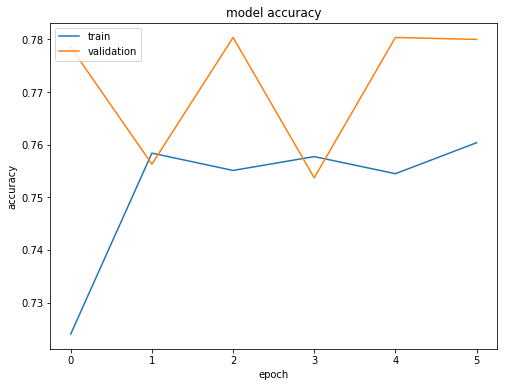

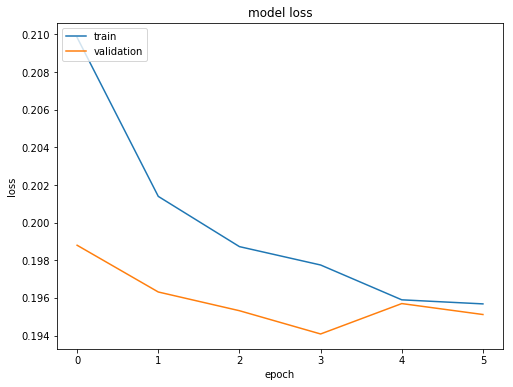

In [28]:
# list all data in history
fig_size[0]=8
fig_size[1]=6
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [23]:
import itertools
from sklearn.metrics import roc_curve, auc, roc_auc_score, log_loss, accuracy_score, confusion_matrix

#Functions for the visualisation of confusion matrices and ROC curves
def plot_cm(ax, y_true, y_pred, classes, title, th=0.5, cmap=plt.cm.Blues):
    y_pred_labels = (y_pred>th).astype(int)
    
    cm = confusion_matrix(y_true, y_pred_labels)
    
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.set_title(title)

    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks)
    ax.set_yticks(tick_marks)
    ax.set_xticklabels(classes)
    ax.set_yticklabels(classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')

def plot_auc(ax, y_train, y_train_pred, y_test, y_test_pred, th=0.5):

    y_train_pred_labels = (y_train_pred>th).astype(int)
    y_test_pred_labels  = (y_test_pred>th).astype(int)

    fpr_train, tpr_train, _ = roc_curve(y_train,y_train_pred)
    roc_auc_train = auc(fpr_train, tpr_train)
    acc_train = accuracy_score(y_train, y_train_pred_labels)

    fpr_test, tpr_test, _ = roc_curve(y_test,y_test_pred)
    roc_auc_test = auc(fpr_test, tpr_test)
    acc_test = accuracy_score(y_test, y_test_pred_labels)

    ax.plot(fpr_train, tpr_train)
    ax.plot(fpr_test, tpr_test)

    ax.plot([0, 1], [0, 1], 'k--')

    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('ROC curve')
    
    train_text = 'train acc = {:.3f}, auc = {:.2f}'.format(acc_train, roc_auc_train)
    test_text = 'test acc = {:.3f}, auc = {:.2f}'.format(acc_test, roc_auc_test)
    ax.legend([train_text, test_text])

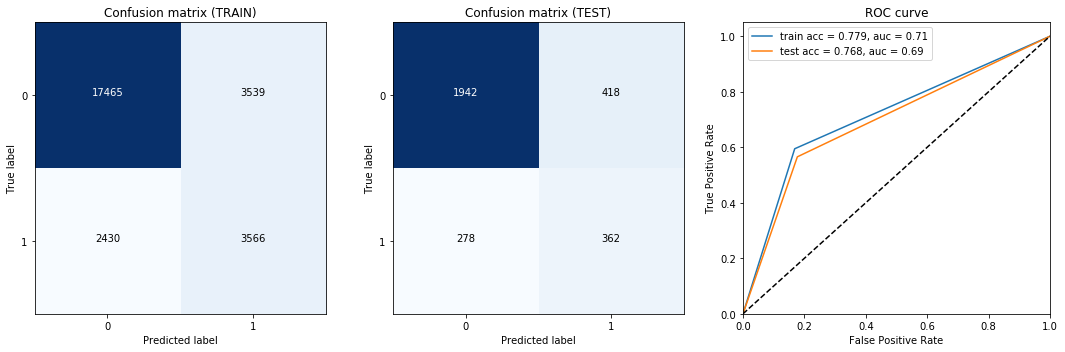

In [24]:
#Call the confusion matrix and the ROC curve functions for the train and the test set

y_train_pred = model.predict_classes(predictors_train)
y_test_pred = model.predict_classes(predictors_test)
#Plot the confusion matrix for the training and the testing set

fig,ax = plt.subplots(1,3)
fig.set_size_inches(15,5)

plot_cm(ax[0], target_train, y_train_pred,classes =[0,1],  title = 'Confusion matrix (TRAIN)')
plot_cm(ax[1], target_test, y_test_pred, classes =[0,1], title ='Confusion matrix (TEST)')

#Plot the auc curve for both training and test set
plot_auc(ax[2], target_train, y_train_pred, target_test, y_test_pred)
    
plt.tight_layout()
plt.show()

In [25]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

#Accuracy, precision, recall and F1_score
def performance_metric(y_truth, y_pred, label):
    performance_metrics = [ label,
        accuracy_score(y_truth, y_pred),
        f1_score(y_truth, y_pred),
        precision_score(y_truth, y_pred),
        recall_score(y_truth, y_pred)] 
    return performance_metrics

pm_train= performance_metric(target_train, y_train_pred, 'train_dataset')
pm_test= performance_metric(target_test, y_test_pred, 'test_dataset')

pm_list=[]
pm_list.append(pm_train)
pm_list.append(pm_test)

pm_list
columns=['dataset','accuracy', 'f1', 'precision', 'recall']

pm_df = pd.DataFrame(pm_list, columns=columns)
pm_df

,dataset,accuracy,f1,precision,recall
0,train_dataset,0.778926,0.544386,0.501900,0.594730
1,test_dataset,0.768000,0.509859,0.464103,0.565625


In [26]:
#logistic regression
lr = LogisticRegression(random_state=0)
lr.fit(predictors_train, target_train)
#print('Test Results')
#print('Accuracy: ', lr.score(predictors_test, target_test))
#print('Recall Score: ', recall_score(target_test, lr.predict(predictors_test)))
#lr_predictions =  lr.predict(predictors_test)
#print(confusion_matrix(target_test, lr_predictions))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

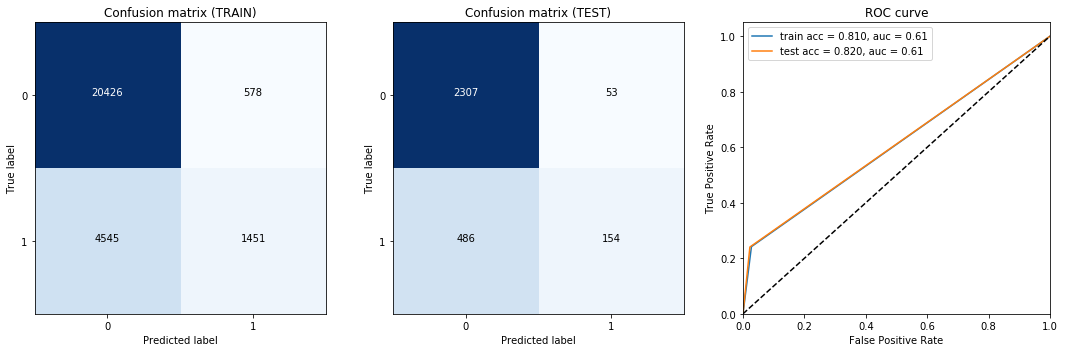

,dataset,accuracy,f1,precision,recall
0,train_dataset,0.810259,0.361620,0.715131,0.241995
1,test_dataset,0.820333,0.363636,0.743961,0.240625


In [27]:
#Call the confusion matrix and the ROC curve functions for the train and the test set

y_train_pred = lr.predict(predictors_train)
y_test_pred =lr.predict(predictors_test)
#Plot the confusion matrix for the training and the testing set

fig,ax = plt.subplots(1,3)
fig.set_size_inches(15,5)

plot_cm(ax[0], target_train, y_train_pred,classes =[0,1],  title = 'Confusion matrix (TRAIN)')
plot_cm(ax[1], target_test, y_test_pred, classes =[0,1], title ='Confusion matrix (TEST)')

#Plot the auc curve for both training and test set
plot_auc(ax[2], target_train, y_train_pred, target_test, y_test_pred)
    
plt.tight_layout()
plt.show()

#metrics
pm_train= performance_metric(target_train, y_train_pred, 'train_dataset')
pm_test= performance_metric(target_test, y_test_pred, 'test_dataset')

pm_list=[]
pm_list.append(pm_train)
pm_list.append(pm_test)

pm_list
columns=['dataset','accuracy', 'f1', 'precision', 'recall']

pm_df = pd.DataFrame(pm_list, columns=columns)
pm_df